# **1. 분류와 회귀**
- 분류 : 미리 정의된 여러 클래스 레이블 중 하나를 예측하는 것.
    - 분류하고자 하는 클래스가 2개인 경우 이진 분류, 3개 이상인 경우 다중 분류라고 한다.
    - 이진 분류에서는 양성 (positive) / 음성 (negative) 클래스로 나뉜다.
    
    
- 회귀 : 데이터 특성을 이용하여 실수 수치를 예측하는 것.

## **1-1. 지도 학습 알고리즘**
- 분류 예제를 위한 데이터 셋은 scikit-learn의 위스코신 유방암 데이터 셋을 이용한다.
    - 유방암 임상 데이터를 기반으로 종양이 양/악성임을 분류하도록 하는 데이터 셋이다.
    - scikit-learn 데이터 셋은 실제 데이터와 데이터 셋 관련 정보를 담고 있는 Bunch 객체에 저장되어 있다.
        - Bunch 객체는 딕셔너리와 비슷하지만 점 표기법으로 사용할 수 있다.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

## 그래프나 데이터 적재와 관련된 코드가 구현되어 있는 유틸리티 패키지이다.
import mglearn

Text(0, 0.5, 'feature 2')

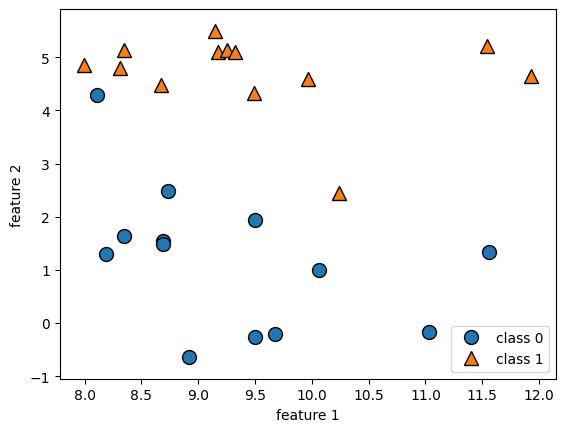

In [2]:
## forge 데이터 셋은 인위적으로 만들어진 이진 분류 데이터 셋이다.
x, y = mglearn.datasets.make_forge()

## x축은 첫 번째 특성, y축은 두 번째 특성을 나타내는 산점도를 그린다.
## 점의 색과 모양은 데이터 포인트가 속한 클래스를 나타낸다.
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.legend(['class 0', 'class 1'], loc = 4)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [3]:
cancer = load_breast_cancer()
print(f'keys : {cancer.keys()}')
print(f'dataset shape : {cancer.data.shape}')

keys : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
dataset shape : (569, 30)


- 유방암 데이터 셋은 30개의 특성과 569개의 데이터 포인트를 가지고 있다.
- 569개의 데이터 셋 중 212개는 악성, 357개는 양성 데이터이다.

In [4]:
dist_ = {k : v for k, v in zip(cancer.target_names, 
                      np.bincount(cancer.target))}
print(f'[클래스 별 샘플 개수] \n{dist_}')

## feature_name를 이용하여 각 특성의 의미를 파악할 수 있다.
print(f'[특성 이름] \n{cancer.feature_names}')

[클래스 별 샘플 개수] 
{'malignant': 212, 'benign': 357}
[특성 이름] 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### **1-1.1. k-최근접 이웃 (kNN / k-Nearest Neighbors)**
#### **(1) k-NN 분류**
- 특정 데이터 포인트에서 가장 가까운 k개의 이웃을 찾는 알고리즘이다.
    - 둘 이상의 이웃을 선택할 때 각 레이블에 속하는 이웃이 몇 개인지 계산하여 더 많은 클래스로 레이블을 지정한다.

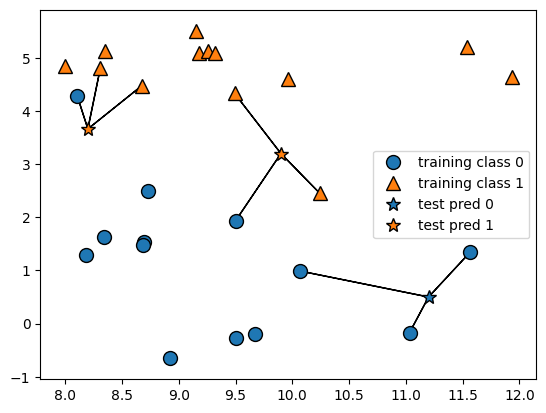

In [5]:
## 아래 코드는 k = 3일 때 사용하는 예제이다.
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [6]:
## scikit-learn의 kNN을 사용해보자.
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 99)

In [7]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [8]:
## 테스트 데이터 셋에 대해서는 predict 메서드를 호출해 예측한다.
## 데이터 포인트에 대해 학습 데이터 셋에서 가장 가까운 이웃을 계산한 다음 가장 많은 클래스를 찾는다.
print(f'테스트 세트 정답  : {test_y}')
print(f'테스트 세트 예측  : {clf.predict(test_x)}')
print(f'테스트 세트 정확도 : {clf.score(test_x, test_y)*100:.2f}%')

테스트 세트 정답  : [0 0 1 0 1 0 0]
테스트 세트 예측  : [0 0 1 0 1 0 0]
테스트 세트 정확도 : 100.00%


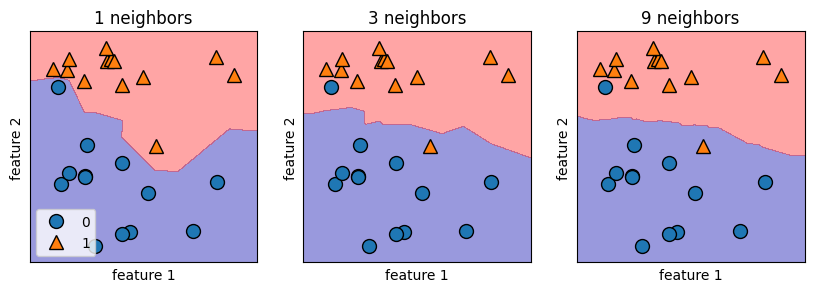

In [9]:
## 클래스 별로 지정한 영역으로 나뉘는 결정 경계 (decision boundary)를 볼 수 있다.
## 아래 코드는 k= 1, 3, 9때의 결정 경계를 보여준다.

_, axes = plt.subplots(1, 3, figsize = (10, 3))
for k, ax in zip([1, 3, 9], axes):
    
    clf = KNeighborsClassifier(n_neighbors = k).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill = True,
                                    eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax = ax)
    ax.set_title(f'{k} neighbors')
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    
axes[0].legend(loc = 3)

- k = 1일 때, 결정 경계가 훈련 데이터에 가깝게 따라가고, k가 커질수록 모델이 더 단순해 진다.
    - k를 학습데이터 수와 동일하게 한다면, 모든 데이터 포인트가 같은 이웃을 가지므로,   
      새로운 데이터 포인트를 입력했을 때 모두 같은 예측값을 가지게 된다.
- 아래 코드는 위스콘신 유방암 데이터 셋을 이용한 예제이다.

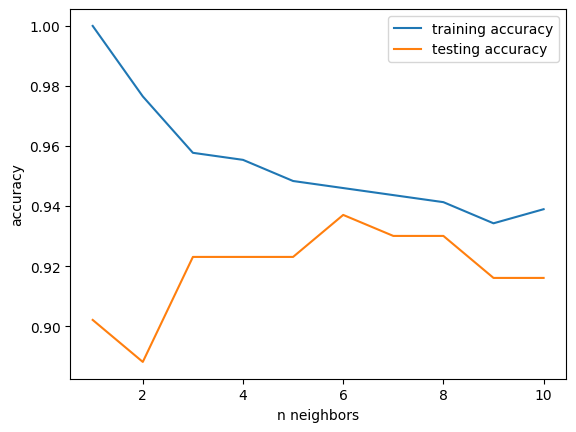

In [10]:
train_x, test_x, train_y, test_y = train_test_split(
                                    cancer.data, cancer.target, 
                                    stratify = cancer.target, random_state = 66
                                )
train_acc, test_acc = [], []
for k in range(1, 11):
    
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(train_x, train_y)
    
    train_acc.append(clf.score(train_x, train_y))
    test_acc.append(clf.score(test_x, test_y))
    
plt.plot(range(1, 11), train_acc, label = 'training accuracy')
plt.plot(range(1, 11),  test_acc, label =  'testing accuracy')

plt.ylabel("accuracy")
plt.xlabel("n neighbors")
plt.legend()

- 위 그래프에서 k가 커질수록 학습 정확도는 떨어지는 반면,  
  시험 데이터 셋은 k가 1일 때가 k가 컸을때보다 정확도가 낮았다.
    - 이는 k = 1일 때 모델을 너무 복잡하게 만들어 과적합 되었음을 보이고,  
      k = 10일때는 모델이 너무 단순화 되어 과소적합으로 인해 오히려 정확도가 떨어졌음을 보인다.
      
#### **[NOTE] 과대적합(over-fitting)과 과소적합(under-fitting)**
- 모델이 처음보는 데이터에 대해 정확하게 예측할 수 있으면 학습 셋에서 테스트 셋으로 일반화 되었다고 한다.
- 모델이 너무 복잡해져 새로운 데이터에 일반화되기 어려워지는 것을 과대 적합이라고 한다.
- 데이터의 특성과 다양성을 잡아내지 못하는 너무 단순한 모델이 되는 것을 과소 적합이라고 한다.

#### **(2) k-NN 회귀**
- k-NN을 회귀 문제에서도 사용할 수 있다.
    - 회귀에서는 k가 2 이상일 때, 최근접 이웃 간의 평균값으로 예측된다.

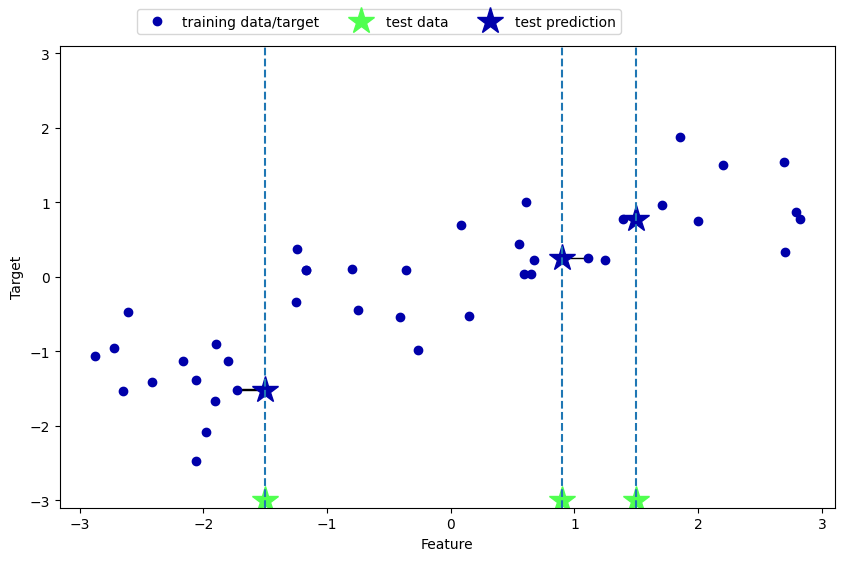

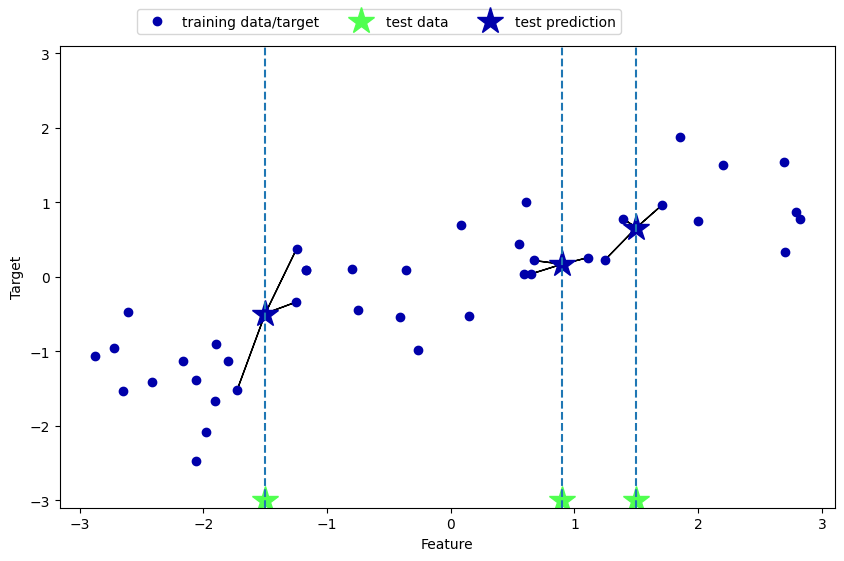

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
x, y = mglearn.datasets.make_wave(n_samples = 40)
train_x, test_x, train_y, test_y = train_test_split(x, y, 
                                                    random_state = 0)

In [14]:
reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(train_x, train_y)

print(f'[실제 테스트 셋 레이블] \n{test_y}\n')
print(f'[테스트 셋 예측 결과] \n{reg.predict(test_x)}\n')

print(f'학습  셋 R^2 score : {reg.score(train_x, train_y) * 100:.2f}%')
print(f'테스트 셋 R^2 score : {reg.score(test_x, test_y)*100:.2f}%')

[실제 테스트 셋 레이블] 
[ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]

[테스트 셋 예측 결과] 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]

학습  셋 R^2 score : 81.94%
테스트 셋 R^2 score : 83.44%


### **[NOTE] R^2 Score**
$$R^2=1-\frac{\sum(y-\hat{y})^2}{sum(y-\bar{y})^2},$$
$$where\; \hat{y}\;:\;모델의\;예측\;값,$$
$$\;\;\;\;\;\;\;\;\;\;\;\bar{y}\;:\;타깃\;값의\;평균값$$

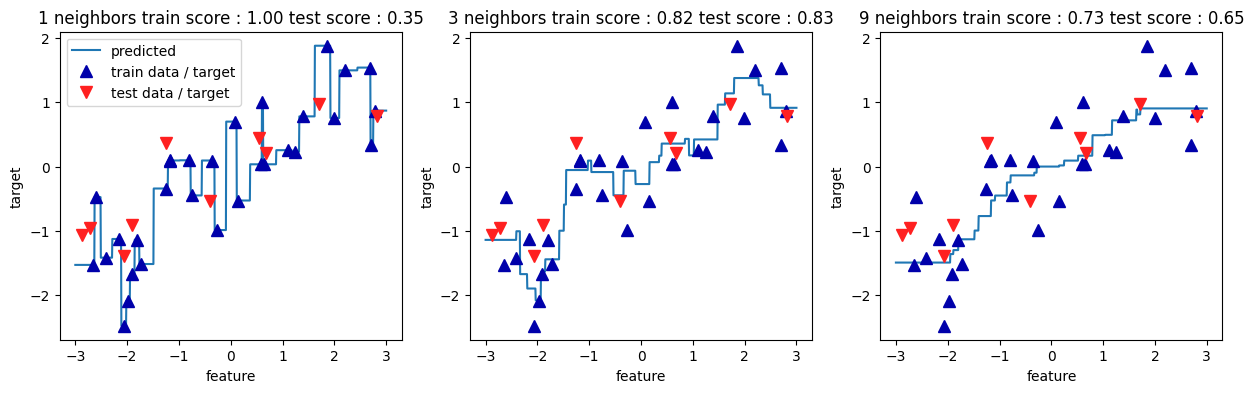

In [15]:
_, axes = plt.subplots(1, 3, figsize = (15, 4))
line    = np.linspace(-3, 3, 1000).reshape(-1, 1)

for k, ax in zip([1, 3, 9], axes):
    
    reg = KNeighborsRegressor(n_neighbors = k)
    reg.fit(train_x, train_y)
    
    ax.plot(line, reg.predict(line))
    ax.plot(train_x, train_y, "^", c = mglearn.cm2(0), markersize = 8)
    ax.plot( test_x,  test_y, "v", c = mglearn.cm2(1), markersize = 8)
    
    train_score = reg.score(train_x, train_y)
    test_score  = reg.score( test_x,  test_y)
    
    ax.set_title(
        f'{k} neighbors train score : {train_score:.2f} test score : {test_score:.2f}'
    )
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    
axes[0].legend(["predicted", "train data / target",
                "test data / target"], loc = "best")

- 회귀에서 k = 1로 사용하였을 때, 새로운 데이터 포인트에 훈련 세트가 크게 영향을 주어  
  불안정한 예측값이 만들어진다.
  
#### **[NOTE] k-NN의 장단점**
#### **(1) 장점**
- 주요 하이퍼 파라미터가 두 개 뿐이라 빠르게 생성할 수 있다.
- 모델이 간단하여 이해하기 쉽다.

#### **(2) 단점**
- 학습 데이터 셋이 클 경우 예측이 느려진다.
- sparse하거나 많은 특성을 가진 데이터 셋의 경우에는 잘 쟉동하지 않는다.

### **1-1.2. 선형 모델 (Linear Model)**
- 선형 모델은 입력 특성에 대한 선형 함수를 만들어 예측을 수행한다.

#### **(1) 회귀를 위한 선형 모델**
- 회귀의 선형 모델을 위한 일반화된 예측함수는 아래와 같다.
    $$\hat{y}=w_0x_0+...+w_nx_n+b=\sum_{i=0}^nw_ix_i + b,$$
    $$where\; x_0,...,x_n : 데이터\;포인트에\;대한\;특성$$
    $$w_0, ..., w_n, b : 학습에\;사용되는\;파라미터들$$

w[0]: 0.393906  b: -0.031804


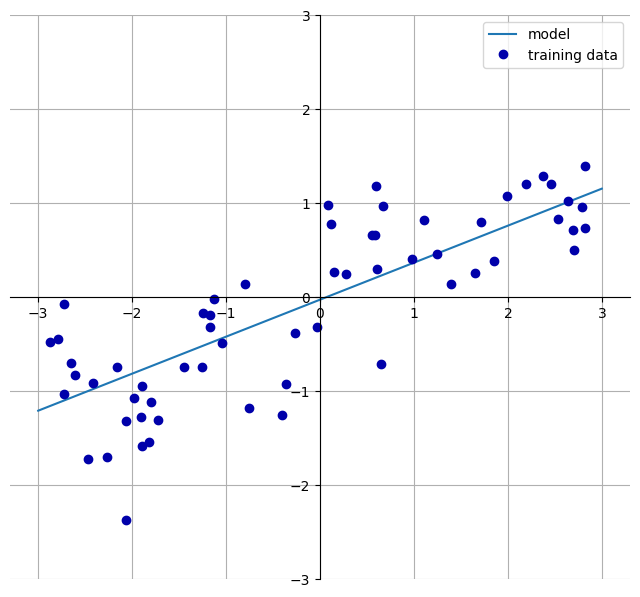

In [16]:
mglearn.plots.plot_linear_regression_wave()

#### **(1)-1. 선형 회귀(최소 제곱법)**
- 예측값과 타깃 y 사이의 평균 제곱 오차를 최소화하는 파라미터 w, b를 찾는다.

#### **[NOTE] 평균 제곱 오차(Mean Squared Error)**
$$MSE=\frac{1}{N}\sum_{i=1}^N(y_i - \hat{y}_i)^2,\;where\;N:데이터\;수$$

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
x, y = mglearn.datasets.make_wave(n_samples = 60)
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 42)

lr = LinearRegression().fit(train_x, train_y)

## 기울기 파라미터 w는 가중치라고 하며, lr의 coef_에 저장된다.
## 특성이 여러개 있으면, 각 특성에 대응되는 가중치가 np.array로 저장되어 반환된다.
print(f'lr weight : {lr.coef_}')

## 절편 파라미터 b는 편향이라고 하며, lr의 intercept_에 저장되어 있다.
print(f'lr bias : {lr.intercept_}\n')


print(f'학습 데이터 셋 점수 : {lr.score(train_x, train_y):.3f}')
print(f'시험 데이터 셋 점수 : {lr.score( test_x,  test_y):.3f}')

lr weight : [0.39390555]
lr bias : -0.03180434302675973

학습 데이터 셋 점수 : 0.670
시험 데이터 셋 점수 : 0.659


In [19]:
x, y = mglearn.datasets.load_extended_boston()
train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                   random_state = 0)
lr = LinearRegression().fit(train_x, train_y)

print(f'학습 데이터 셋 점수 : {lr.score(train_x, train_y):.3f}')
print(f'시험 데이터 셋 점수 : {lr.score( test_x,  test_y):.3f}')

학습 데이터 셋 점수 : 0.952
시험 데이터 셋 점수 : 0.607


- 위 두 예제에서 보이듯이 기본 선형 회귀 모델은 모델의 복잡도를 조정할 수 없어  
  과대적합, 과소 적합이 잘 일어난다.

#### **(1)-2. 리지 회귀**
- 리지 회귀도 기본 선형 회귀모델에서 사용한 것과 같은 예측함수를 사용한다.
    - 가중치의 절대값을 최대한 작게 만들어 모든 특성이 출력에 주는 영향을 최소화하여 모델 복잡도를 조절한다.
        - 이러한 제약을 정규화라고 하는데, 리지 회귀에서는 L2 정규화를 사용한다..
        
#### **[NOTE] L2 정규화 (L2 Regularization)**
$$Cost = \frac{1}{N}\sum_{i=1}^{N}\{ L(y_i, \hat{y_i})+\frac{\lambda}{2}\lvert w\rvert^2\},\;where\;\frac{\lambda}{2}:weight\;decay$$
- 이 떄 weight decay를 크게 하면 패널티 효과가 커지고, 작게하면 작아진다.

In [20]:
from sklearn.linear_model import Ridge

In [21]:
ridge_1 = Ridge(alpha = 1).fit(train_x, train_y)
print(f'학습 데이터 셋 점수 : {ridge_1.score(train_x, train_y):.3f}')
print(f'시험 데이터 셋 점수 : {ridge_1.score( test_x,  test_y):.3f}\n')

## alpha 즉, weight decay 텀이 작아질수록 패널티 효과가 적어져.
## 모델의 복잡도가 증가한다.
ridge_01 = Ridge(alpha = 0.1).fit(train_x, train_y)
print(f'학습 데이터 셋 점수 : {ridge_01.score(train_x, train_y):.3f}')
print(f'시험 데이터 셋 점수 : {ridge_01.score( test_x,  test_y):.3f}\n')

## 반대로 alpha가 커지면, 패널티 효과가 커져 모델의 복잡도가 감소한다.
ridge_10 = Ridge(alpha = 100).fit(train_x, train_y)
print(f'학습 데이터 셋 점수 : {ridge_10.score(train_x, train_y):.3f}')
print(f'시험 데이터 셋 점수 : {ridge_10.score( test_x,  test_y):.3f}')

학습 데이터 셋 점수 : 0.886
시험 데이터 셋 점수 : 0.753

학습 데이터 셋 점수 : 0.928
시험 데이터 셋 점수 : 0.772

학습 데이터 셋 점수 : 0.596
시험 데이터 셋 점수 : 0.415


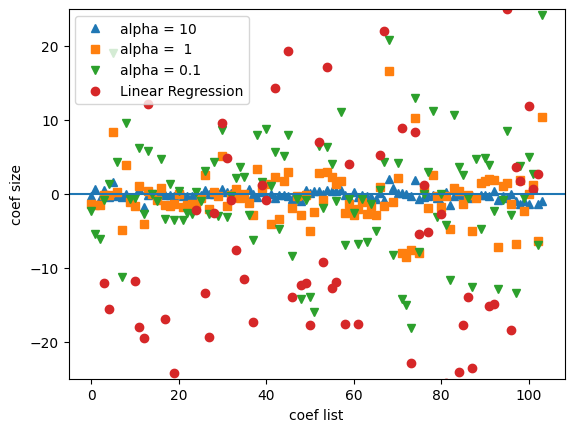

In [22]:
plt.plot(ridge_10.coef_, '^', label =        "alpha = 10")
plt.plot( ridge_1.coef_, 's', label =        'alpha =  1')
plt.plot(ridge_01.coef_, 'v', label =       'alpha = 0.1')
plt.plot(      lr.coef_, 'o', label = 'Linear Regression')

plt.xlabel("coef list")
plt.ylabel("coef size")

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

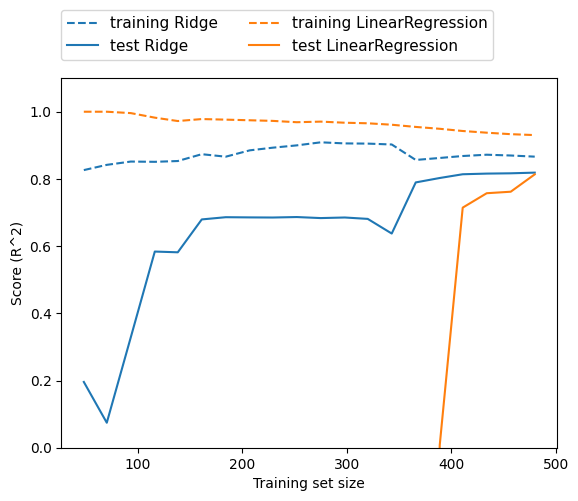

In [23]:
mglearn.plots.plot_ridge_n_samples()

- 위 두 그래프를 확인해 보았을 때, 아래와 같은 사실을 알 수 있다.
    - alpha가 커질수록 릿지 모델의 계수가 커지고, 아무 규제가 없는 선형 회귀 계수 값은 한계 값을 넘어가 버린다.
    - 데이터 셋의 크기가 커질수록 두 모델 모두 성능이 더 좋아진다.
        - 데이터를 충분히 주면 규제 항이 영향을 덜 끼쳐 리지회귀와 선형 회귀의 성능이 같아진다.

#### **(1)-3. 라쏘 회귀**
- 라쏘 회귀도 리지 회귀처럼 계수를 0에 가깝게 만들려고 한다.
    - 라쏘 회귀에서는 L1 정규화를 사용한다.
        - L1 규제를 사용했을 때 완전히 특성이 제외되는 것이 생긴다.  
            &rarr; 특성 선택이 자동으로 이뤄진다고 볼 수 있고, 모델을 이해하기 쉬워진다.
        
#### **[NOTE] L1 정규화 (L1 Regularization)**
$$Cost = \frac{1}{N}\sum_{i=1}^{N}\{ L(y_i, \hat{y_i})+\frac{\lambda}{2}\lvert w\rvert\},\;where\;\frac{\lambda}{2}:weight\;decay$$

In [24]:
from sklearn.linear_model import Lasso

In [33]:
lasso = Lasso().fit(train_x, train_y)
print(f'훈련 데이터 셋 점수 : {lasso.score(train_x, train_y):.3f}')
print(f'시험 데이터 셋 점수 : {lasso.score( test_x,  test_y):.3f}')
print(f'사용한 특성 수     : {np.sum(lasso.coef_ != 0)}\n')

## 위의 코드에서는 특성을 4개만 사용하여, 과소적합 되었다.
## L1 규제에서 alpha 값을 줄이기 위해서는 max_iter 값을 늘려야한다.
lasso001 = Lasso(alpha = 0.01, max_iter = 50000).fit(train_x, train_y)
print(f'훈련 데이터 셋 점수 : {lasso001.score(train_x, train_y):.3f}')
print(f'시험 데이터 셋 점수 : {lasso001.score( test_x,  test_y):.3f}')
print(f'사용한 특성 수     : {np.sum(lasso001.coef_ != 0)}\n')

lasso00001 = Lasso(alpha = 0.0001, max_iter = 50000).fit(train_x, train_y)
print(f'훈련 데이터 셋 점수 : {lasso00001.score(train_x, train_y):.3f}')
print(f'시험 데이터 셋 점수 : {lasso00001.score( test_x,  test_y):.3f}')
print(f'사용한 특성 수     : {np.sum(lasso00001.coef_ != 0)}')

훈련 데이터 셋 점수 : 0.293
시험 데이터 셋 점수 : 0.209
사용한 특성 수     : 4

훈련 데이터 셋 점수 : 0.896
시험 데이터 셋 점수 : 0.766
사용한 특성 수     : 33

훈련 데이터 셋 점수 : 0.951
시험 데이터 셋 점수 : 0.644
사용한 특성 수     : 96


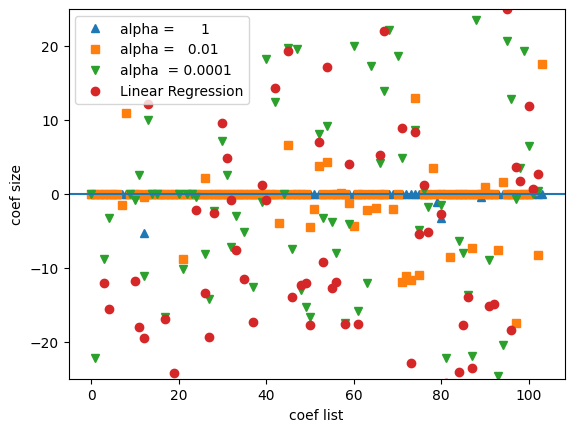

In [36]:
plt.plot(     lasso.coef_, '^', label =    "alpha =      1")
plt.plot(  lasso001.coef_, 's', label =    'alpha =   0.01')
plt.plot(lasso00001.coef_, 'v', label =   'alpha  = 0.0001')
plt.plot(        lr.coef_, 'o', label = 'Linear Regression')

plt.xlabel("coef list")
plt.ylabel("coef size")

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

- 두 모델 중 보통 리지 회귀를 선호한다.
    - 데이터 셋에 특성이 많고 일부 특성이 중요하다면 라쏘를 선호한다.
    - scikit-learn에서는 라쏘와 리지의 패널티를 조합한 ElasticNet도 제공한다.

# **99. 참고자료**
## **99-1. 도서**  
- 파이썬 라이브러리를 활용한 머신러닝 | 안드레아스 뮐러, 박해선 역 / 한빛미디어
## **99-2. 논문, 학술지**

## **99-3. 웹 사이트**

## **99-4. 데이터셋 출처**